In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [3]:
#Loading data as Training and Testing sets
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
Miss_Percent=100*(train_data.isnull().sum()/len(train_data))

In [9]:
Miss_Percent=Miss_Percent[Miss_Percent>0].sort_values(ascending=False).round(1)

In [10]:
#Creating a dataframe to show percentage of missing data and its respective data column in table
DataFrame=pd.DataFrame(Miss_Percent)
miss_percent_table=DataFrame.rename(columns={0:'% of Missing Values'})
MissPercent=miss_percent_table

MissPercent

,% of Missing Values
PoolQC,99.5
MiscFeature,96.3
Alley,93.8
Fence,80.8
FireplaceQu,47.3
LotFrontage,17.7
GarageType,5.5
GarageYrBlt,5.5
GarageFinish,5.5
GarageQual,5.5


In [11]:
train_data=train_data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [12]:
train_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [13]:
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('None')

In [14]:
train_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [15]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

In [16]:
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [17]:
train_data['GarageCond']=train_data['GarageCond'].fillna('None')

In [18]:
train_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [19]:
train_data['GarageQual'] = train_data['GarageQual'].fillna('None')

In [20]:
train_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [21]:
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('None')

In [22]:
train_data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [23]:
#Replacing the Null Value with 
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

In [24]:
train_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [25]:
train_data['GarageType']=train_data['GarageType'].fillna('None')

In [26]:
train_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [27]:
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna('None')

In [28]:
train_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [29]:
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna("None")

In [30]:
train_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [31]:
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna('None')

In [32]:
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [33]:
train_data['BsmtCond']=train_data['BsmtCond'].fillna('None')

In [34]:
train_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [35]:
train_data['BsmtQual']=train_data['BsmtQual'].fillna('None')

In [36]:
train_data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [37]:
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)

In [38]:
train_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [39]:
train_data['MasVnrType']=train_data['MasVnrArea'].fillna("Others")

In [40]:
train_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [41]:
train_data['Electrical']=train_data['Electrical'].fillna('None')

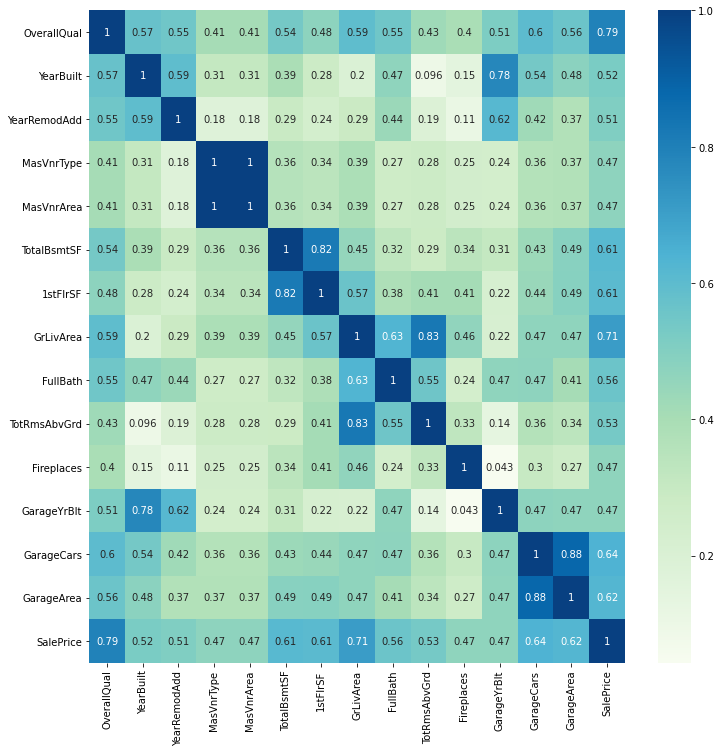

In [42]:
#Calculating Correlation 
correlation=train_data.corr()
Positive_Related=correlation.index[abs(correlation["SalePrice"])>0.4]

#Plotting the Correlation in HeatMap for the data columns which has correlation value more than 0.4
plt.figure(figsize=(12,12))
Corr_Heatmap=sns.heatmap(train_data[Positive_Related].corr(),annot=True,cmap="GnBu")

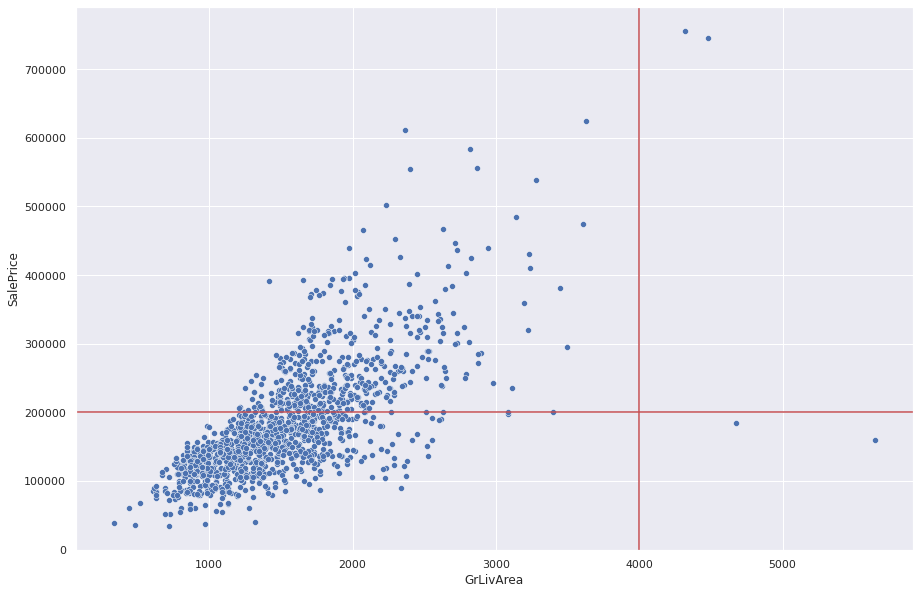

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)
plt.axhline(y=200000,color='r')
plt.axvline(x=4000,color='r')

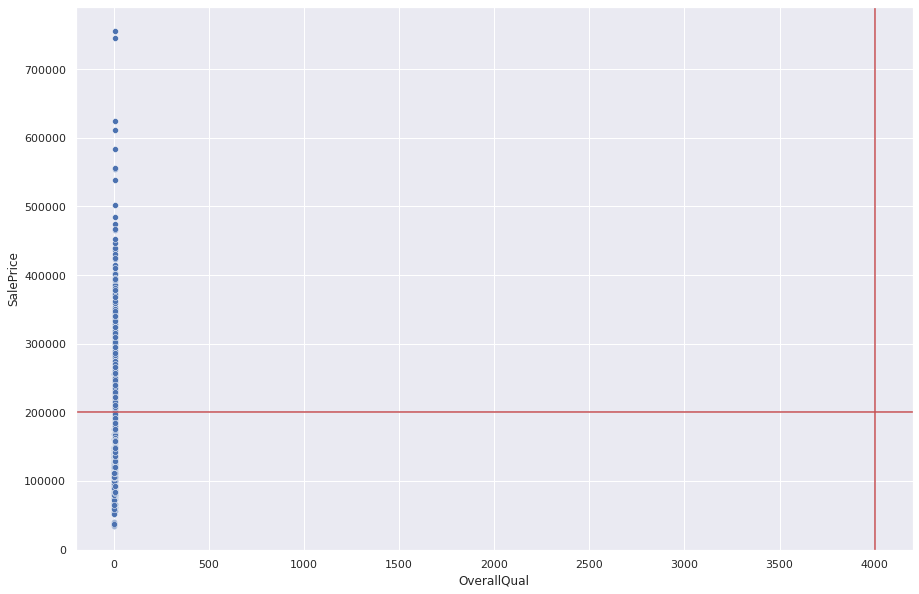

In [44]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_data)
plt.axhline(y=200000,color='r')
plt.axvline(x=4000,color='r')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

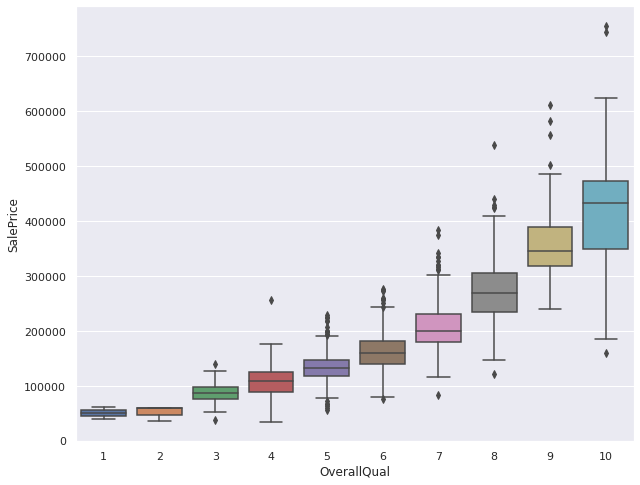

In [45]:
#BoxPlot for OverallQual Column
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)


In [46]:
#Deleting Outliers
train_data=train_data.drop(train_data[(train_data['GrLivArea']>4000)&(train_data['SalePrice']>300000)].index)

In [47]:
test_id=test_data['Id']
test_data=test_data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [48]:
#Converting String into Number
new_train_data=train_data.apply(lambda x:pd.factorize(x)[0])
test_data=test_data.apply(lambda x:pd.factorize(x)[0])

In [49]:
X_train=new_train_data.drop('SalePrice',axis=1)
Y_train=train_data['SalePrice']
X_test=test_data
X_train.shape, Y_train.shape, X_test.shape

((1458, 75), (1458,), (1459, 75))

In [50]:
print("Building and Training the Model,Predicting and Displaying the Output")

Building and Training the Model,Predicting and Displaying the Output


In [51]:
#Random forest regres3s3or

In [52]:
#Library for Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [53]:
model=RandomForestRegressor(n_estimators=50)
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))

0.9675333330920407


In [54]:
#Making predictions on test set 
Y_predict=model.predict(X_test)

In [55]:
output=pd.DataFrame({'Id':test_id,'SalePrice':Y_predict})
print(output)

        Id  SalePrice
0     1461  209327.10
1     1462  190300.30
2     1463  183137.00
3     1464  192856.80
4     1465  148033.50
...    ...        ...
1454  2915  198996.20
1455  2916  222637.80
1456  2917  242632.10
1457  2918  144071.86
1458  2919  170362.00

[1459 rows x 2 columns]


In [56]:
#linear regressor

In [57]:
linearModel=LinearRegression()
linearModel.fit(X_train, Y_train)
print(linearModel.score(X_train,Y_train))

0.6446144293754088


In [58]:
#making prediction using Linear Model
Linear_predict=linearModel.predict(X_test)

In [59]:
#Creating Dataframe to store the Ids with Prediction
linear_output=pd.DataFrame({'Id':test_id,'SalePrice':Linear_predict})
print(linear_output)

        Id      SalePrice
0     1461  181809.136643
1     1462  196571.042448
2     1463  156938.125044
3     1464  155003.044677
4     1465  147759.578294
...    ...            ...
1454  2915   98541.439147
1455  2916  148155.183641
1456  2917  190389.527350
1457  2918  163341.856890
1458  2919  180987.004053

[1459 rows x 2 columns]


In [60]:
#using lassoregression

In [61]:
#Building the Model in Lasso Regression Model
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train,Y_train)

#Testing the Model
lasso_predict=lasso_model.predict(X_test)

#Creating dataframe to store ID with prediction
lasso_output=pd.DataFrame({'Id':test_id,'SalePrice':lasso_predict})
print(lasso_output)

        Id      SalePrice
0     1461  181818.442190
1     1462  196569.494762
2     1463  156953.218206
3     1464  154973.985285
4     1465  147774.744498
...    ...            ...
1454  2915   98529.811985
1455  2916  148090.211216
1456  2917  190385.446654
1457  2918  163325.700781
1458  2919  170435.259724

[1459 rows x 2 columns]


In [62]:
r_model=Ridge(alpha=1.0)
r_model.fit(X_train,Y_train)

#Testing the model
r_predict=r_model.predict(X_test)

#Creating dataframe to store ID with prediction
r_output=pd.DataFrame({'Id':test_id,'SalePrice':r_predict})
print(r_output)

        Id      SalePrice
0     1461  182005.552461
1     1462  196731.891434
2     1463  157201.412649
3     1464  155336.693114
4     1465  148057.656855
...    ...            ...
1454  2915   98386.443820
1455  2916  146758.624102
1456  2917  190150.547976
1457  2918  162985.059283
1458  2919  181331.166759

[1459 rows x 2 columns]


In [63]:
#storing the predition in a csv file

In [64]:
output.to_csv("House_Price_Prediction.csv",index=False)
print("Completed")

Completed
